<a href="https://colab.research.google.com/github/bachsykhang/StockPredictVinamilk/blob/main/Vinamilk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình
from sklearn.model_selection import train_test_split

from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dropout 
from keras.layers import Dense 
from sklearn.linear_model import LinearRegression
from sklearn import set_config

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error 

In [2]:
import datetime as dt
from vnstock import * #import all functions, including functions that provide OHLC data for charting
from vnstock.chart import * # import chart functionsThêm MonthLocator vào để sửa lỗi


#  Đọc dữ liệu

In [3]:
start = "2021-01-01"
end = dt.datetime.now().strftime("%Y-%m-%d")

In [4]:
def load_data(company):
    CGT=stock_historical_data(symbol=company,start_date=start,end_date=end,resolution="1D",type="stock",beautify=True, decor=False)
    return CGT

In [5]:
df = load_data("VCB")

In [6]:
df.shape

(869, 7)

In [7]:
df.head()

,time,open,high,low,close,volume,ticker
0,2021-01-04,64269,65450,63810,64930,855900,VCB
1,2021-01-05,64930,65980,64930,65120,739200,VCB
2,2021-01-06,65250,69650,65120,68860,2080400,VCB
3,2021-01-07,68200,71160,68200,70170,889000,VCB
4,2021-01-08,70830,70830,68530,68730,963900,VCB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    869 non-null    object
 1   open    869 non-null    int64 
 2   high    869 non-null    int64 
 3   low     869 non-null    int64 
 4   close   869 non-null    int64 
 5   volume  869 non-null    int64 
 6   ticker  869 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.7+ KB


In [9]:
df.describe()

,open,high,low,close,volume
count,869.000000,869.000000,869.000000,869.000000,8.690000e+02
mean,74320.857307,75135.668585,73468.193326,74318.686997,1.269709e+06
std,10861.587518,10825.459190,10907.348196,10861.402817,6.564680e+05
min,53340.000000,55290.000000,52500.000000,52500.000000,1.139000e+05
25%,64940.000000,65550.000000,64069.000000,64930.000000,8.220000e+05
50%,70280.000000,71130.000000,69430.000000,70170.000000,1.130300e+06
75%,85500.000000,86100.000000,84800.000000,85500.000000,1.561000e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,6.274200e+06


In [10]:
df

,time,open,high,low,close,volume,ticker
0,2021-01-04,64269,65450,63810,64930,855900,VCB
1,2021-01-05,64930,65980,64930,65120,739200,VCB
2,2021-01-06,65250,69650,65120,68860,2080400,VCB
3,2021-01-07,68200,71160,68200,70170,889000,VCB
4,2021-01-08,70830,70830,68530,68730,963900,VCB
...,...,...,...,...,...,...,...
864,2024-06-24,86000,87400,85500,85500,2149800,VCB
865,2024-06-25,85700,86700,85500,85500,1565900,VCB
866,2024-06-26,85900,86300,85200,85200,1706900,VCB
867,2024-06-27,85200,86000,85200,85200,1423000,VCB


In [11]:
print("starting date: ",df.iloc[0][0])
print("end date: ",df.iloc[-1][0])

starting date:  2021-01-04
end date:  2024-05-08


In [12]:
df.time = pd.to_datetime(df['time'])
monthvise= df.groupby(df['time'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
time,,
January,75592.948052,75984.922078
February,77327.910448,77464.925373
March,76151.333333,76031.000000
April,75537.696203,75444.924051
May,71051.953846,71101.630769
June,73102.545455,73343.439394
July,72944.984375,72911.703125
August,74410.397059,74484.352941
September,73099.576271,72915.508475


In [13]:
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})

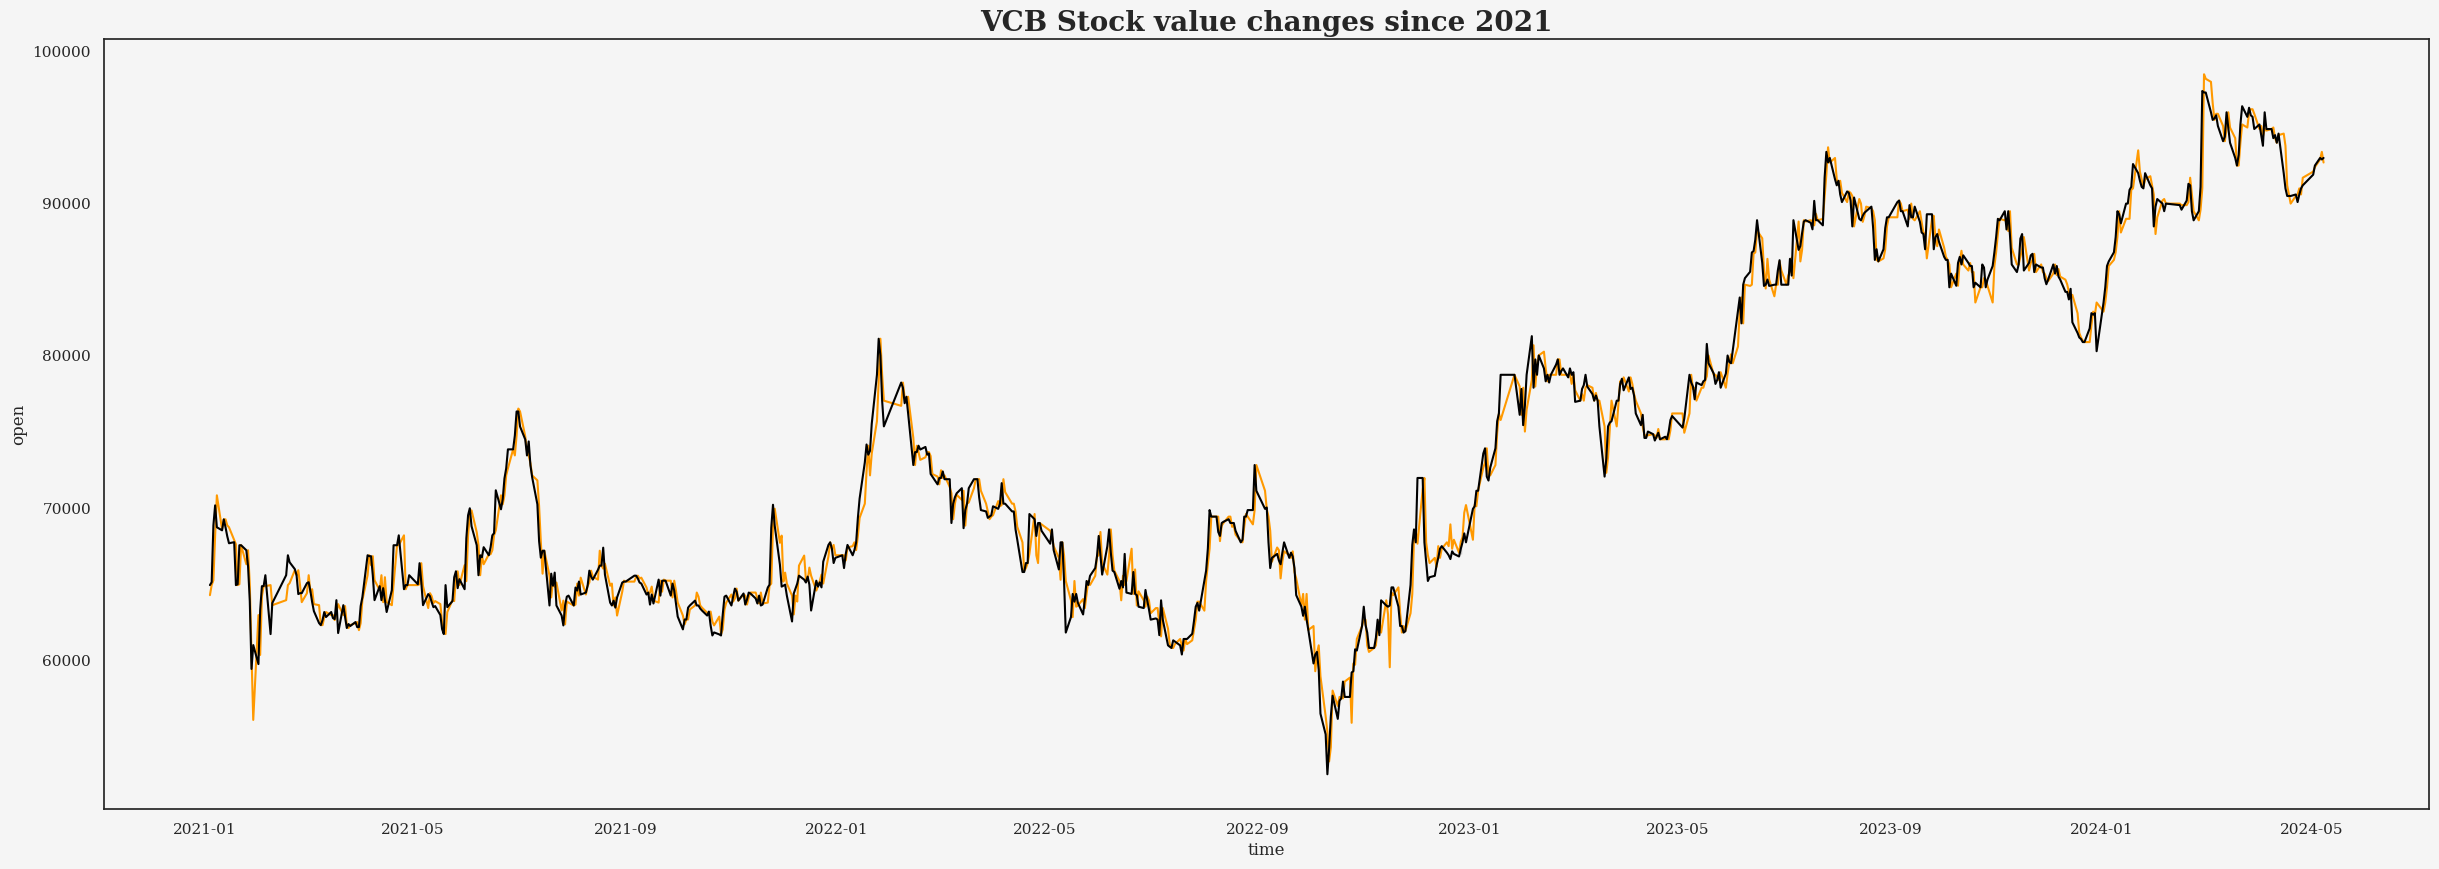

In [14]:

fig = plt.figure(figsize=(30, 10))
ax = sns.lineplot(data=df, x='time', y='open')
ax = sns.lineplot(data=df, x='time', y='close', color=colors[1])
plt.title("VCB Stock value changes since 2021", size=20, weight='bold')
plt.show()

Text(0.5, 1.0, 'VCB Stock volume')

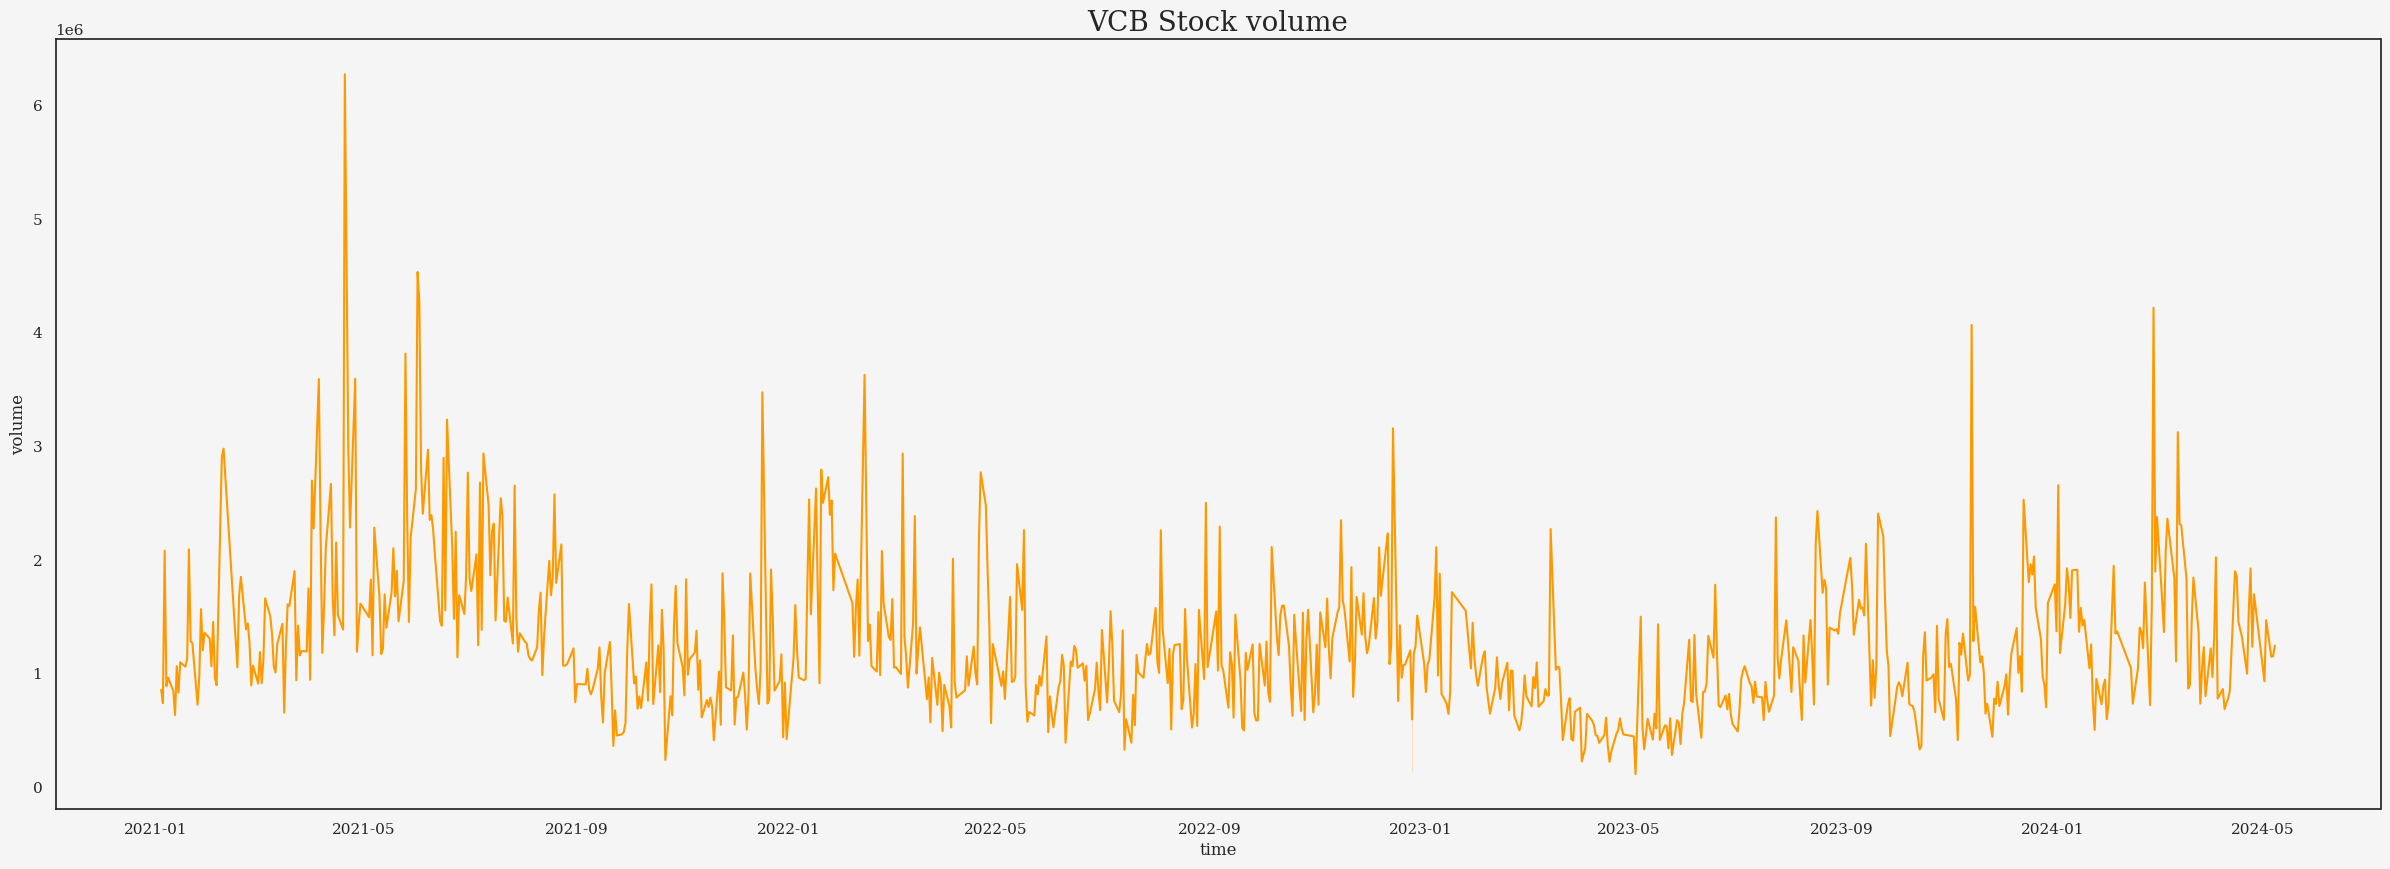

In [15]:
fig = plt.figure(figsize=(30,10))
ax = sns.lineplot(data = df, x= 'time',y='volume')
plt.title("VCB Stock volume",size = 20)

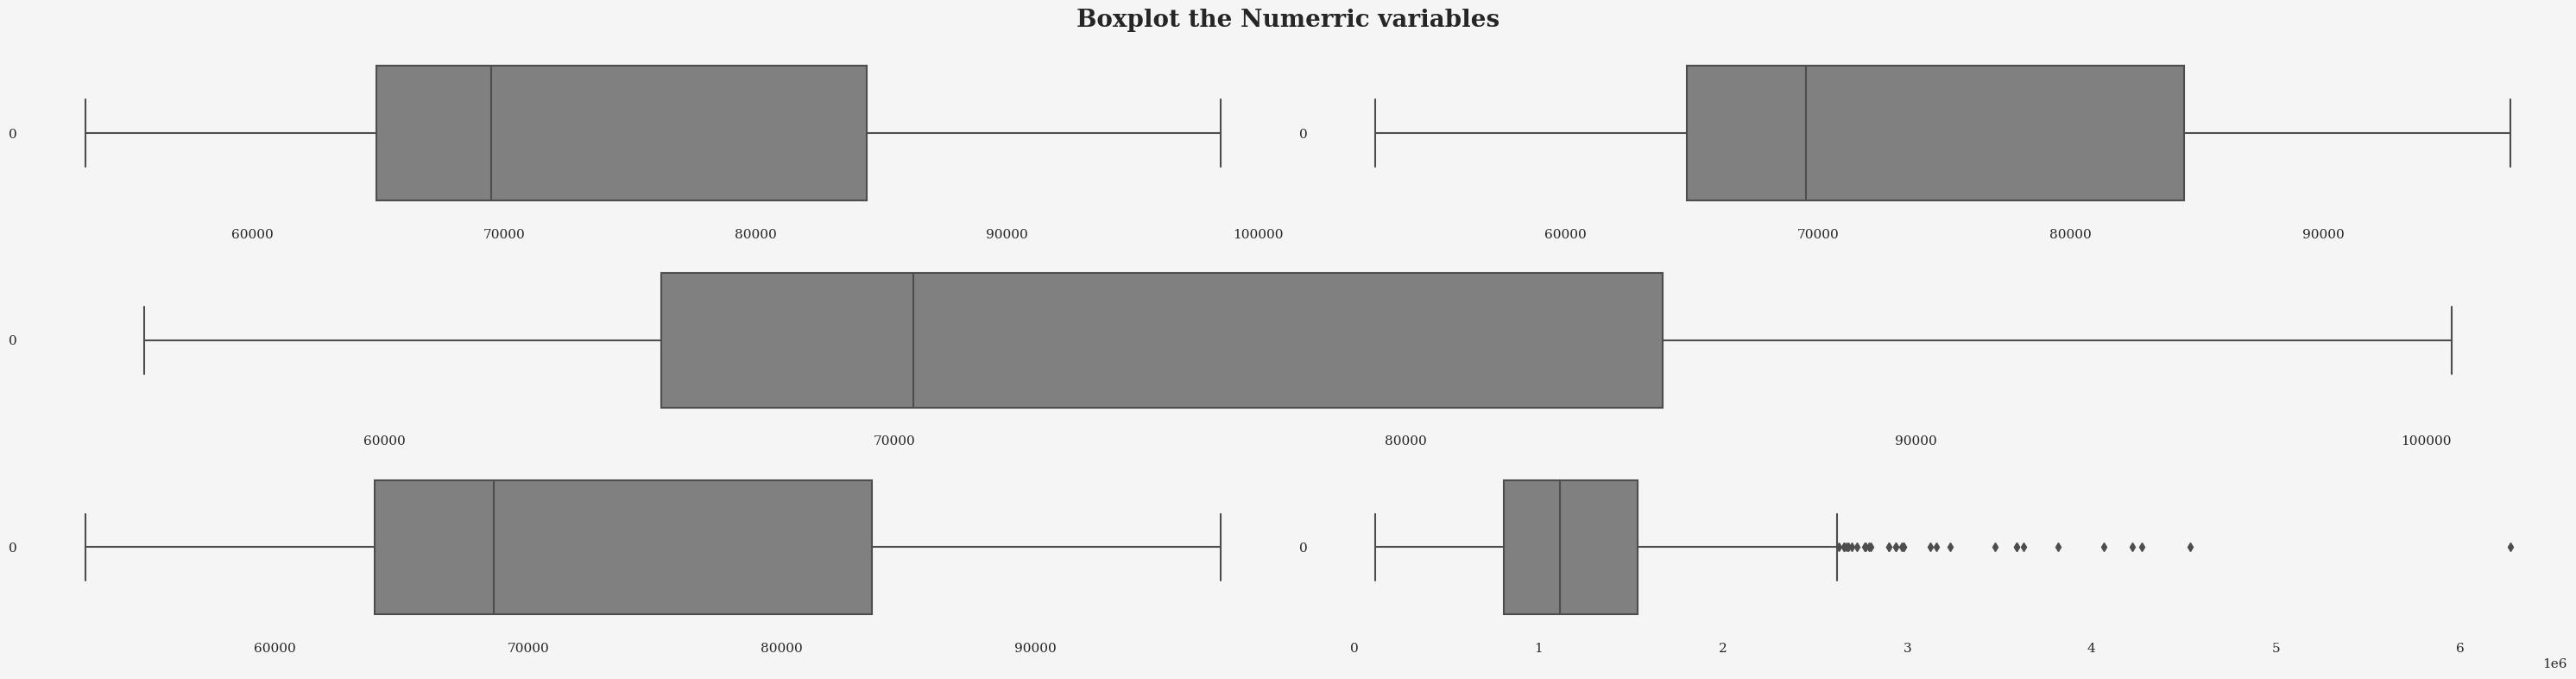

In [17]:
fig = plt.figure(figsize = (30,8),tight_layout=True)
plt.suptitle("Boxplot the Numerric variables",size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df.open,ax = ax['A'],color='grey',orient="horizontal")
sns.boxplot(df.close,ax = ax['B'],color='grey',orient="horizontal")
sns.boxplot(df.high,ax = ax['C'],color='grey',orient="horizontal")
sns.boxplot(df.low,ax = ax['D'],color='grey',orient="horizontal")
sns.boxplot(df.volume,ax = ax['E'],color='grey',orient="horizontal")


for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

/Users/luonghaidang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


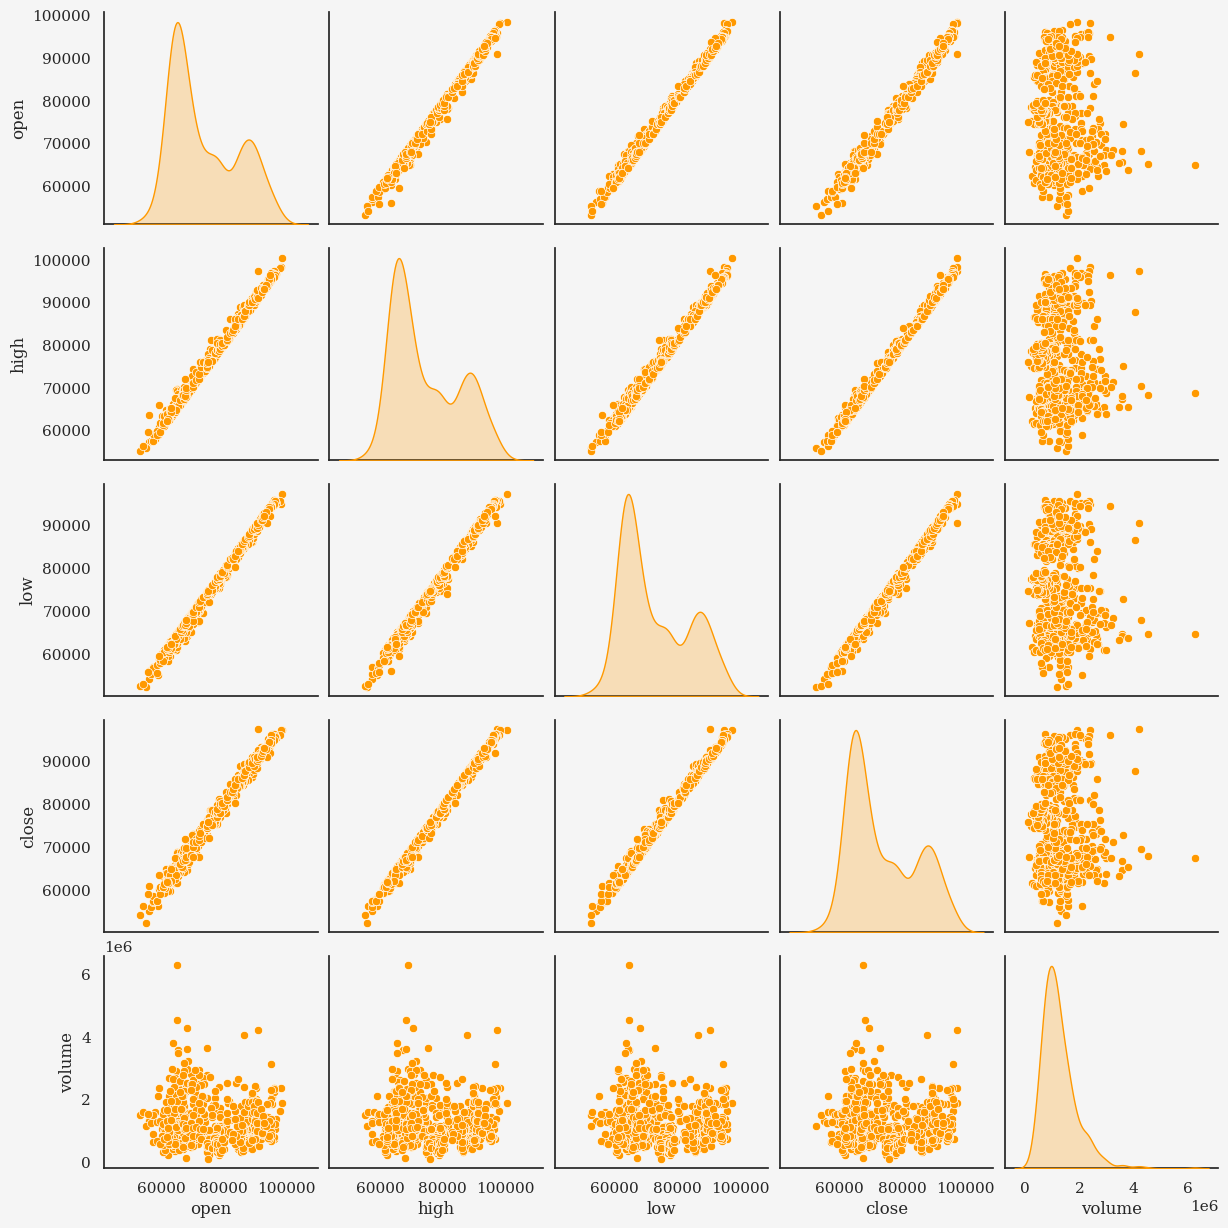

In [18]:
sns.pairplot(df,diag_kind='kde')

# Tương quan 

<Axes: >

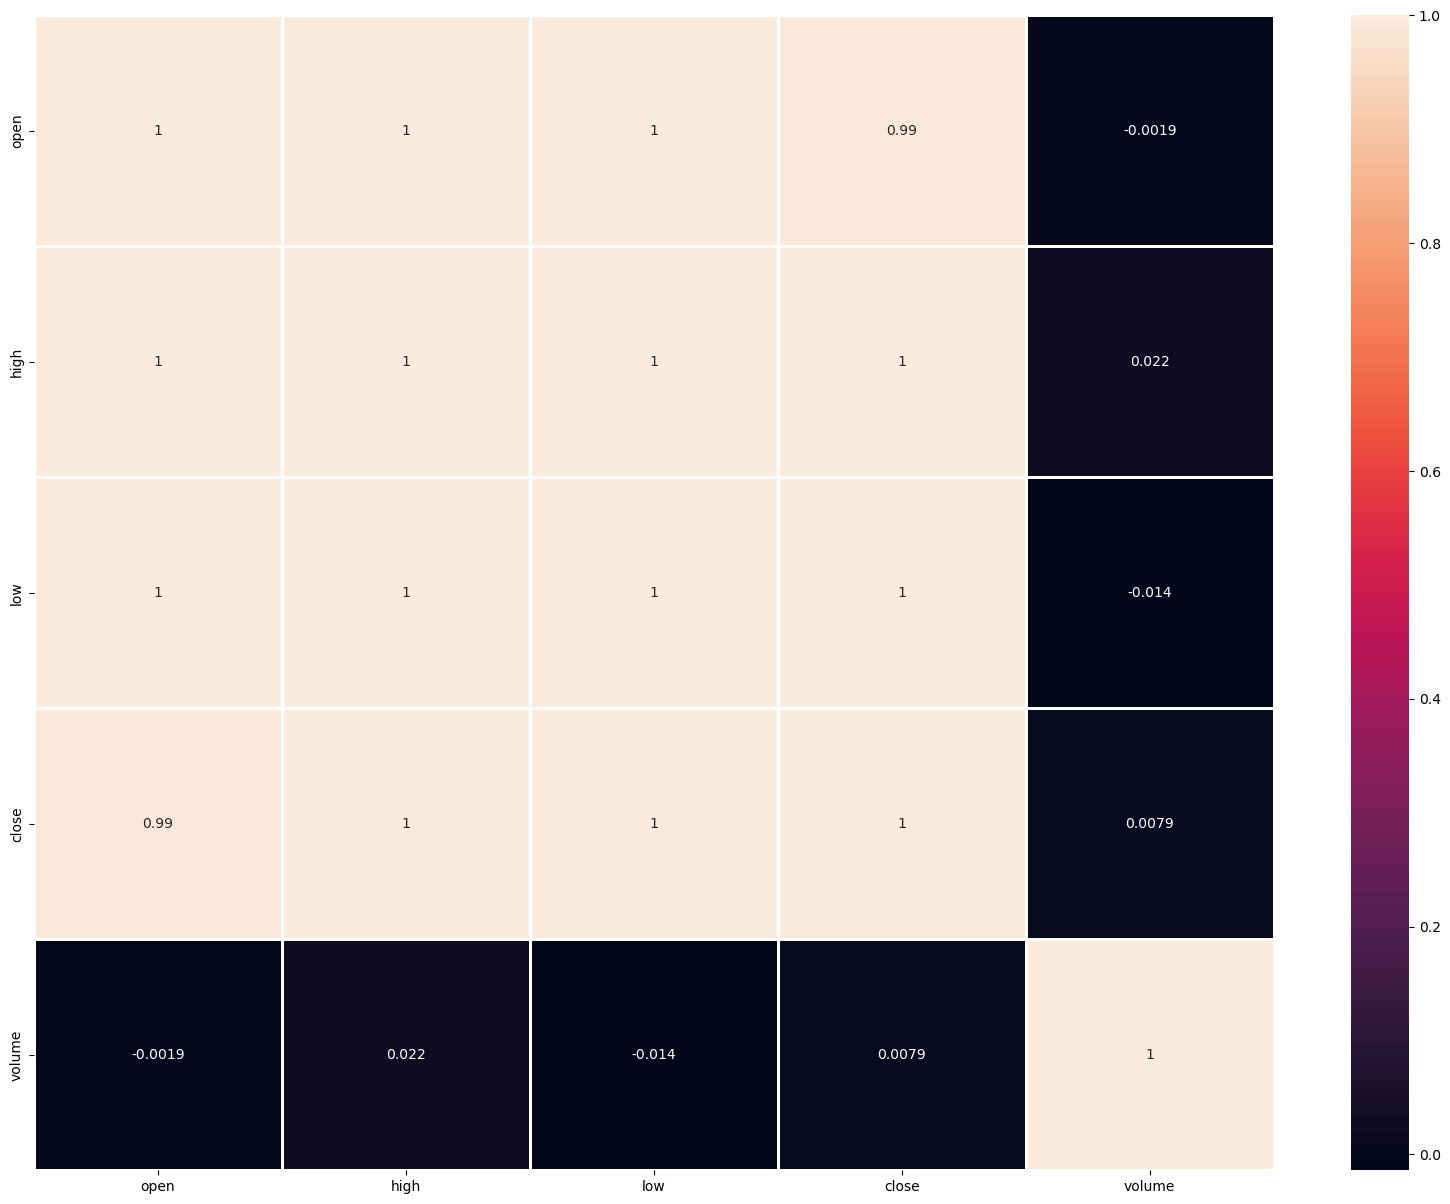

In [12]:
fig = plt.figure(figsize=(20,15))
df1=df.drop("time",axis=1)
df1=df1.drop("ticker",axis=1)
sns.heatmap(df1.corr(),annot=True,linewidths=2)

# Xây dựng mô hình

In [104]:
sc = MinMaxScaler(feature_range=(0, 1))
data = sc.fit_transform(df[['open', 'volume', 'close']])

# Chia dữ liệu thành tập train và test
training_set, test_set = train_test_split(data, test_size=0.3, shuffle=False)

# Tạo tập dữ liệu cho mô hình LSTM
def create_dataset(data, time_step=20):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :3])  
        y.append(data[i,2])  # 'close' mục tiêu dự đoán
    return np.array(X), np.array(y)

# Tạo tập dữ liệu train và test
x_train, y_train = create_dataset(sc_train)
x_test, y_test = create_dataset(sc_test)

# Reshape dữ liệu
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))


## 1. LSTM

In [105]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(units=64,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile mô hình
model.compile(loss='mean_absolute_error', optimizer='adam')

# Huấn luyện mô hình
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100


/Users/luonghaidang/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - loss: 0.2883 - val_loss: 0.1178
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.1162 - val_loss: 0.1110
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1135 - val_loss: 0.1046
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1005 - val_loss: 0.0986
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1006 - val_loss: 0.0905
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1009 - val_loss: 0.0893
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.1041 - val_loss: 0.1083
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0899 - val_loss: 0.0887
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0905 - val_loss: 0.0833
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0880 - val_loss: 0.0983
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0998 - val_loss: 0.0816
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.

Epoch 69/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0498 - val_loss: 0.0633
Epoch 70/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0557 - val_loss: 0.0480
Epoch 71/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0502 - val_loss: 0.0500
Epoch 72/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0472 - val_loss: 0.0483
Epoch 73/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0498 - val_loss: 0.0474
Epoch 74/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0507 - val_loss: 0.0504
Epoch 75/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0484 - val_loss: 0.0521
Epoch 76/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0493 - val_loss: 0.0479
Epoch 77/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0480 - val_loss: 0.0466
Epoch 78/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0487 - val_loss: 0.0534
Epoch 79/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0465 - val_loss: 0.0472
Epoch 80/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 

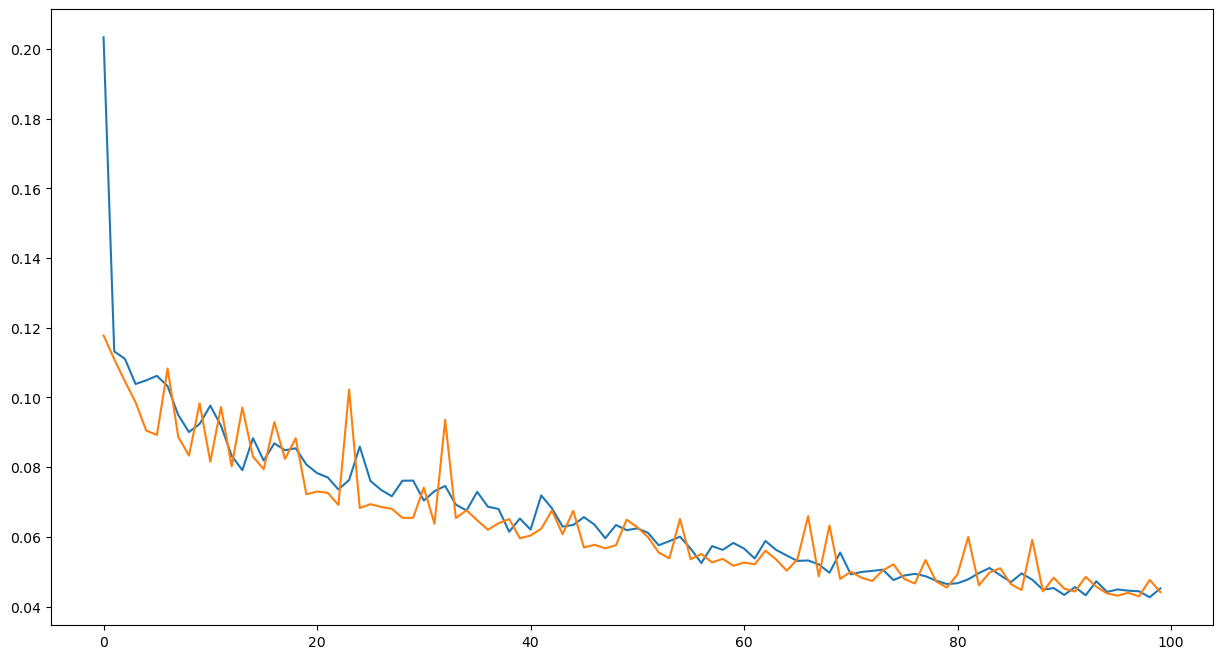

In [106]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.plot(loss)

In [108]:
pred=model.predict(x_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


,test,pred
0,0.330207,0.252121
1,0.246298,0.326583
2,0.371668,0.304957
3,0.392892,0.325659
4,0.413623,0.375304
...,...,...
225,0.728529,0.679670
226,0.758144,0.695775
227,0.782823,0.731730
228,0.777887,0.750338


In [112]:
#Dự đoán dữ liệu test
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# Làm ngược dự đoán trrước khi tính lỗi
trainPredict = sc.inverse_transform(trainPredict)
trainY = sc.inverse_transform([y_train])
testPredict = sc.inverse_transform(testPredict)
testY = sc.inverse_transform([y_test])
# Tính toán hàm mất mát
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


ValueError: non-broadcastable output operand with shape (562,1) doesn't match the broadcast shape (562,3)

Text(180, 0.4, 'Mean Absolute error : 0.04')

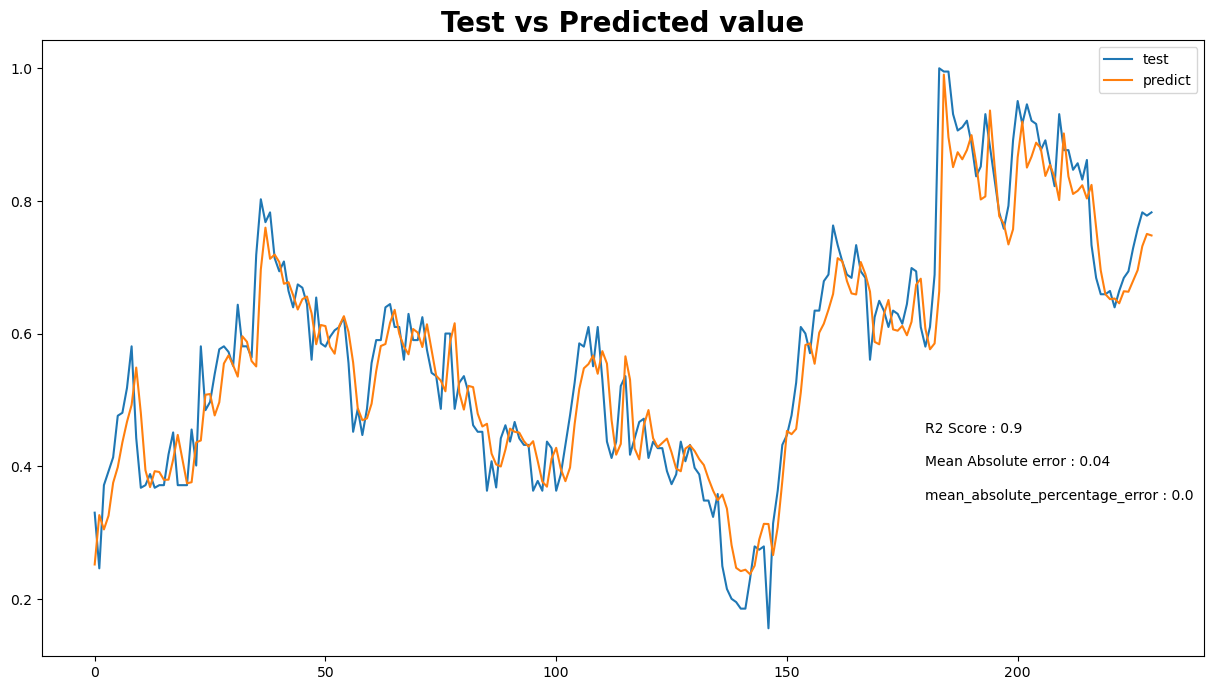

In [120]:
from sklearn.metrics import mean_squared_error
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mape=np.round(mean_absolute_percentage_error(y_test,pred))
mae=np.round(mean_absolute_error(y_test,pred),2)
plt.text(x=180, y=0.45,s='R2 Score : {}'.format(r2))
plt.text(x=180, y=0.35,s='mean_absolute_percentage_error : {}'.format(mape))
plt.text(x=180, y=0.40,s='Mean Absolute error : {}'.format(mae))

#  Linear regression

In [134]:
X=df[['open','volume']]
y=df['close']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [140]:
X_train


array([[-0.6289111 , -0.62347177],
       [-0.50125247, -0.79611908],
       [-0.43945102,  1.18806754],
       ...,
       [ 1.6772488 , -1.22795928],
       [ 1.43197428, -1.72119506],
       [ 1.6772488 ,  0.32971302]])

In [136]:
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

Text(0.5, 1.0, 'Compare test and predicted values')

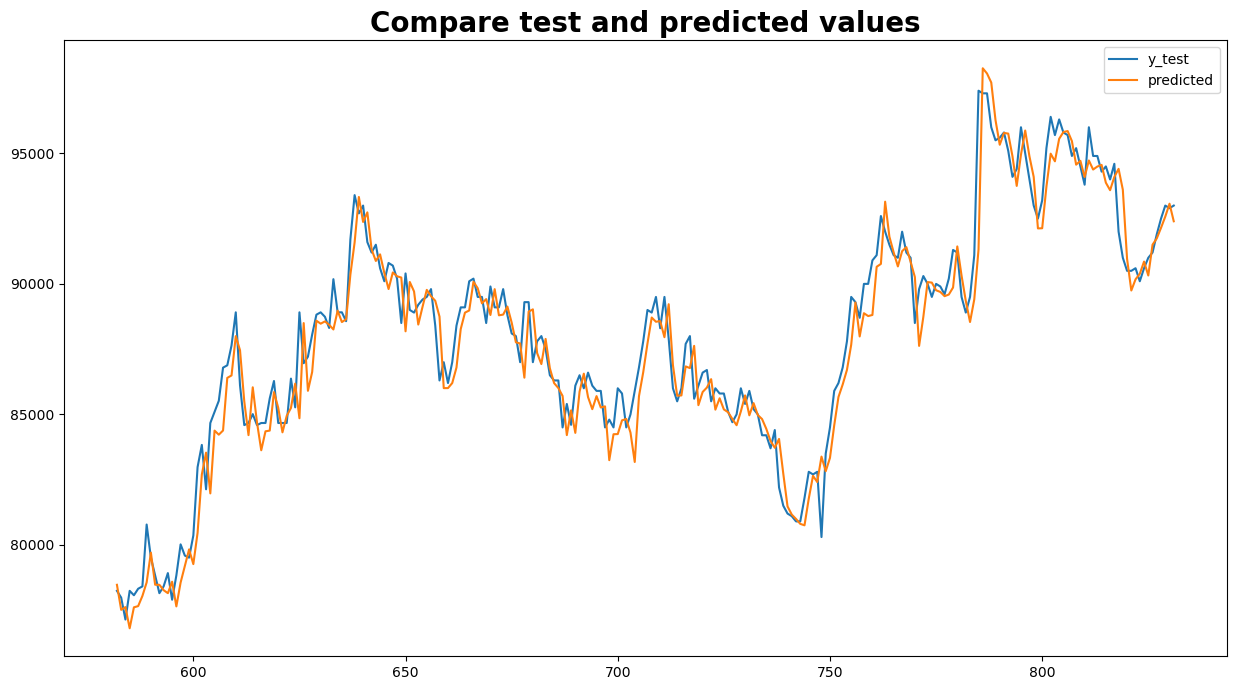

In [137]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')

In [138]:
print('Accuracy score : {} %'.format(sc))
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))


Accuracy score : 94.0 %
R2 Score : 0.94
Mean Squared error : 1230126.04
Mean Absolute error : 1230126.04
